In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import cmath
from astropy.modeling.models import Voigt1D,Lorentz1D
from scipy.special import wofz
import pylab

In [67]:
import numpy as np


def G(x, alpha):
    """ Return Gaussian line shape at x with HWHM alpha """
    return np.sqrt(np.log(2) / np.pi) / alpha\
                             * np.exp(-(x / alpha)**2 * np.log(2))

def L(x, gamma):
    """ Return Lorentzian line shape at x with HWHM gamma """
    return gamma / np.pi / (x**2 + gamma**2)

def V(x, dw, a):
    
    alpha = dw*np.sqrt(np.log(2.0))
    gamma = a*dw
    
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi)


In [71]:
xvals = np.linspace(-10.0,10.0,100)

In [72]:
dw = 2.0
a = 0.5

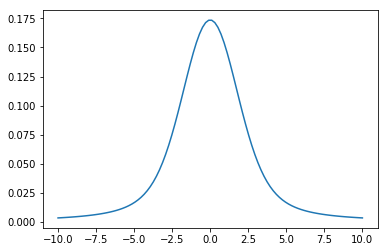

In [75]:
plt.plot(xvals,V(xvals,dw,a))
plt.show()

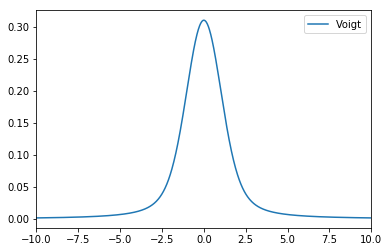

In [60]:
lc = 0.0
dw = 1.0 # set doppler width to be 2 angstorms
a = 1.1*dw

gamma = 2.0*a*dw
alpha = 2.0*dw*np.sqrt(np.log(2.0))


#alpha, gamma = 0.1, 0.1
x = np.linspace(-10.0,10.0,1000)
#pylab.plot(x, G(x, alpha), ls=':', label='Gaussian')
#pylab.plot(x, L(x, gamma), ls='--', label='Lorentzian')
pylab.plot(x, V(x, 1.0, 0.5), label='Voigt')
pylab.xlim(-10.0,10.0)
#pylab.plot(x,phi(lc,dw,a),'r')
pylab.legend()
pylab.show()

In [55]:
np.trapz(phi(lc,dw,a),x)

0.3391836703054918

In [50]:
np.trapz(V(x, alpha, gamma),x)

0.9818894922248531

In [7]:
wavelenths = np.linspace(-10,10,num=50,endpoint=True)

In [8]:
def H(a,u):
    # taken from Voigt functions wikipedia. let g = U + iV
    t = 1.0/(4.0* a**2.0)
    x = u/a
    
    z = (1.0 - 1j*x)/(2.0*np.sqrt(t))

    g = np.sqrt(np.pi/4.0*t) * np.exp(z**2.0) * erfc(z)
    
    return (np.real(g)/(a*np.sqrt(np.pi)))

In [9]:
np.trapz([H(0.1,i)/(np.sqrt(np.pi)) for i in wavelenths],wavelenths)

24.8399969626796

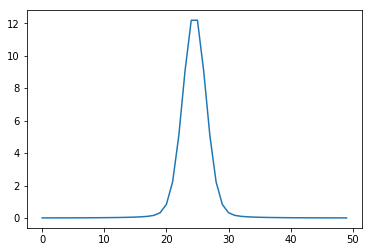

In [10]:
plt.plot([H(0.1,i)/(np.sqrt(np.pi)) for i in wavelenths])

In [11]:
def voigt(x,a):
    z = (x + a*1j)/np.sqrt(2.0)
    w = np.exp(-z**2.0)*erfc(-1j*z)
    return np.real(w)/np.sqrt(2.0*np.pi)

In [12]:
np.trapz([voigt(i,2.0) for i in wavelenths],wavelenths)

0.8730896368701484

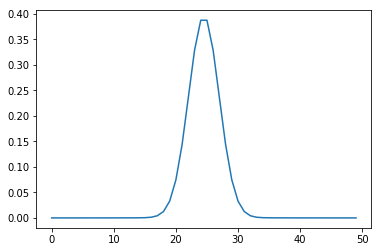

In [13]:
plt.plot([voigt(i,0.01) for i in wavelenths])

In [14]:
def lorentzian(x,a):
    return a*(x**2 + a**2)**(-1.0) * (1.0/np.pi)

In [15]:
wavelenths = np.linspace(-10,10,num=30,endpoint=True)

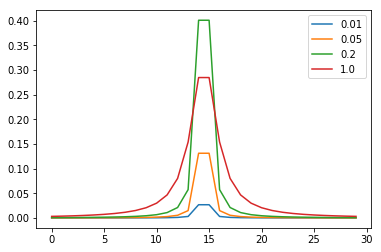

In [16]:
plt.plot([lorentzian(i,0.01) for i in wavelenths],label = '0.01')
plt.plot([lorentzian(i,0.05) for i in wavelenths],label = '0.05')
plt.plot([lorentzian(i,0.2) for i in wavelenths],label = '0.2')
plt.plot([lorentzian(i,1.0) for i in wavelenths],label = '1.0')
plt.legend()
plt.show()

In [ ]:
g# = [gaussian(i) for i in wavelenths]
l = [lorentzian(i,0.020) for i in wavelenths]

In [ ]:
np.sum(l*np.gradient(wavelenths))

In [ ]:
ts =my_convolution(g,l)

In [ ]:
np.trapz(ts,wavelenths)

In [ ]:
np.trapz(np.convolve(g,l,mode = 'same'),wavelenths)

In [ ]:
plt.plot(wavelenths,g,label = 'gaussian')
plt.plot(wavelenths,l,label = 'lorentzian')
plt.show()

In [ ]:
del product

In [ ]:
def my_convolution(arr1,arr2):
    def product(i,arr1,arr2):
        product = np.roll(arr1,int(len(arr1)/2)-i) * arr2
        return np.sum(product)
    return([product(i,arr1,arr2) for i in np.arange(len(arr1))])
    

In [ ]:
np.convolve(g,l,mode='same') - my_convolution(g,l)

In [ ]:
plt.plot(np.log(my_convolution(g,l)))
plt.plot(np.log(np.convolve(g,l,mode='same')))

In [ ]:
[product(i)] for i in np.arange(len(arr1))

In [ ]:
(0,g,l)

In [ ]:
plt.plot(wavelenths,np.roll(g,10))

In [ ]:
voigt

In [ ]:
voigt = np.convolve(g,l)

In [ ]:
plt.plot(voigt,label = 'voigt')

In [ ]:
mode : {‘full’, ‘valid’, ‘same’}, optional

In [ ]:
voigt.shape